# Assignment 1 - Data Preparation
MSDS 422

Load in a .csv file using pandas, explore using "statistical techniques",
graph it in a few different ways, look for relationships, impute missing variables, and convert categorical variables to numeric values




In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

### Import using pandas
filename = "C:\Users\17204\Documents\git\MSDS_coursework\422\Assignment_1\HMEQ_Loss.csv"

For the time being I'm keeping .csv files in my .gitignore file, so to run this from git you will need to change the filepath or load a file into the same folder

In [4]:
# filename
filename = "C:\\Users\\17204\\Documents\\git\\MSDS_coursework\\422\\Assignment_1\\HMEQ_Loss.csv"

# load into a dataframe
hw_df = pd.read_csv(filename)

hw_df.head() # display. I recommend checking out vscode with jupyter notebooks:)


,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Look at dataframe with Statistical Techniques


#### numeric data
From the videos I assume this just means using df.describe().

Could also be interesting to look at things like skew, or any outliers etc.

In [5]:
# .describe() -- this will automatically only pull out the numerical data, not text
hw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


interesting things:
1. 20% of loans are flagged as bad
2. One delinquent loan was for 78k. Oof


#### Categorical data
We'll also take a look using .value_counts on the categorical data


In [6]:
sep_str = '-------------------------------'
# create a list of the columns that are objects
cat_cols = [col for col in hw_df.columns if hw_df[col].dtypes == 'object']

# might as well just get the columns for integers and floats, too
# alternatively I could use unique() on cols to get a list of types, then make a dict
# with dtype as the key and the column name list as the entries
# for a future situation
int_cols = [col for col in hw_df.columns if hw_df[col].dtypes == 'int64']
float_cols = [col for col in hw_df.columns if hw_df[col].dtypes == 'float64']

# display their value_counts
for col in cat_cols:
    print(f"{sep_str}\nNormalized counts of \"{col.capitalize()}\" Column\n{sep_str}\n{hw_df[col].value_counts(normalize=True, dropna=False)}\n{sep_str}\n")

-------------------------------
Normalized counts of "Reason" Column
-------------------------------
DebtCon    0.659060
HomeImp    0.298658
NaN        0.042282
Name: REASON, dtype: float64
-------------------------------

-------------------------------
Normalized counts of "Job" Column
-------------------------------
Other      0.400671
ProfExe    0.214094
Office     0.159060
Mgr        0.128691
NaN        0.046812
Self       0.032383
Sales      0.018289
Name: JOB, dtype: float64
-------------------------------



### Plotting some values
An easy way to explore some of the data.

Let's go ahead and do some histograms for the continuous variables.

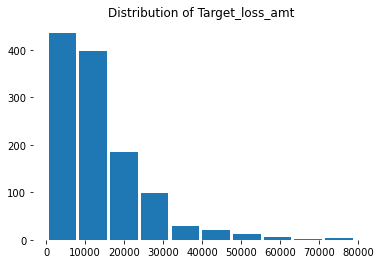

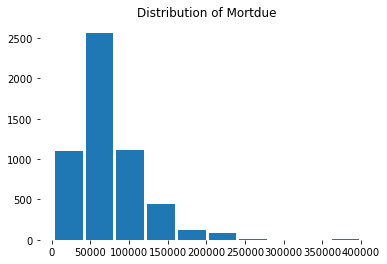

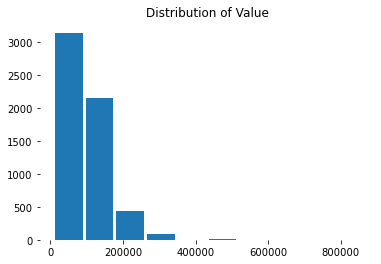

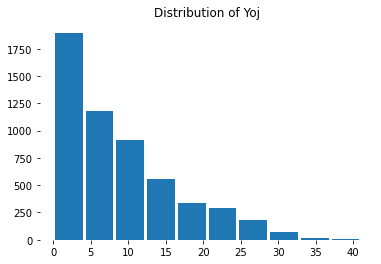

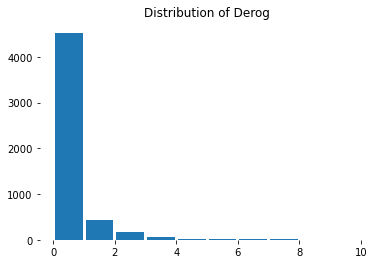

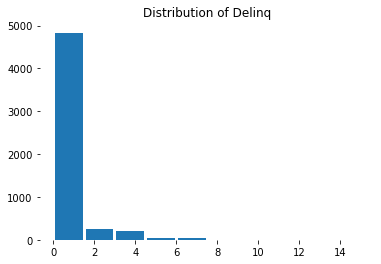

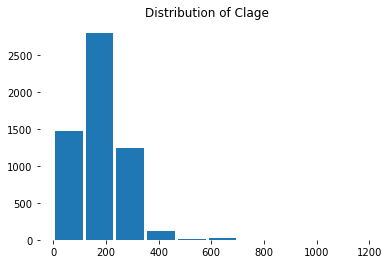

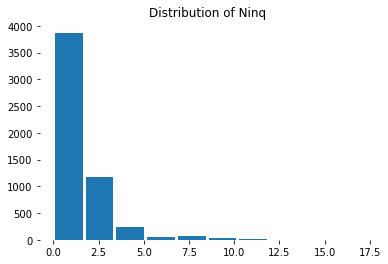

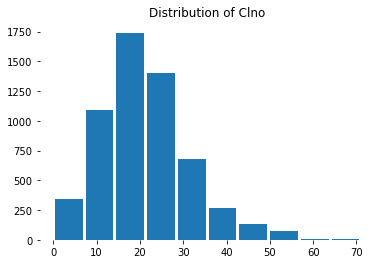

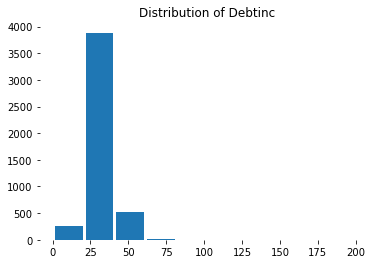

In [7]:
# histogram for each plot
for col in float_cols:
    fig,ax = plt.subplots()
    ax.hist(hw_df[col], rwidth=.9)
    ax.set_title(f"Distribution of {col.capitalize()}")
    fig.patch.set_facecolor('white')
    ax.spines[:].set_color("None")

#### Pie plots for the categorical datasets


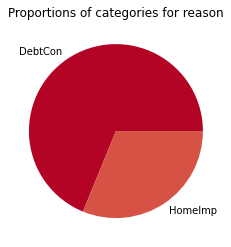

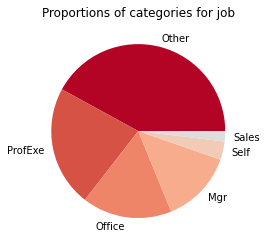

In [8]:
# I like this colormap better

cs = plt.cm.coolwarm_r(np.arange(10)/10)

for col in cat_cols:
    counts = hw_df[col].value_counts()
    fig,ax = plt.subplots()
    ax.pie(counts.values, labels=counts.index.values, colors=cs)
    ax.spines[:].set_color("None")
    fig.patch.set_facecolor("White")
    ax.set_title(f"Proportions of categories for {col.lower()}")

#### And for integer values

from above, it looks like the "target_bad_flag" is just 0/1, whereas the loan is a full range. 
We'll do a pie plot for "target_bad_flag", and a histogram for "loan"

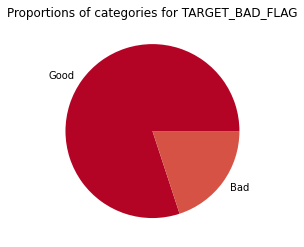

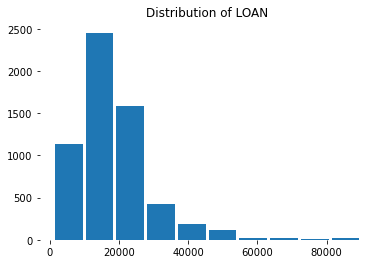

In [9]:
# I like this colormap better
cs = plt.cm.coolwarm_r(np.arange(10)/10)

# pie plot for target_bad_flag
counts = hw_df["TARGET_BAD_FLAG"].replace({0:"Good",1:"Bad"}).value_counts()
fig,ax = plt.subplots()
ax.pie(counts.values, labels=counts.index.values, colors=cs)
ax.spines[:].set_color("None")
fig.patch.set_facecolor("White")
ax.set_title(f"Proportions of categories for TARGET_BAD_FLAG")



# and the histogram for "loan"
fig,ax = plt.subplots()
ax.hist(hw_df["LOAN"], rwidth=.9)
ax.set_title(f"Distribution of LOAN")
fig.patch.set_facecolor('white')
ax.spines[:].set_color("None")

### Looking at relationships

We'll start by just using the groupby expressions with categorical variables.

In [10]:
# for each categorical column we're looking at the percentage of loans that went bad and how much they defaulted on
for col in cat_cols:
    print(f"{hw_df[[col, 'TARGET_BAD_FLAG', 'TARGET_LOSS_AMT']].groupby(col).agg({'TARGET_BAD_FLAG':['mean'],'TARGET_LOSS_AMT':'median'})}\n")


        TARGET_BAD_FLAG TARGET_LOSS_AMT
                   mean          median
REASON                                 
DebtCon        0.189664         13630.0
HomeImp        0.222472          5784.5

        TARGET_BAD_FLAG TARGET_LOSS_AMT
                   mean          median
JOB                                    
Mgr            0.233377         12779.0
Office         0.131857         10208.0
Other          0.231993          9332.0
ProfExe        0.166144         12438.5
Sales          0.348624         15614.0
Self           0.300518         18484.5



From above, folks are slighly more likely to default on loans involved with home improvement than consolidation. However, the loss amounts are smaller than with consolidation.Also it looks like self employed and sales folks are more likely to default, and the loss amount is the highest for them. 
However, those two categories have by far the fewest number of people, so we would likely take that with a grain of salt

We haven't done any analysis to see how desciptive these findings are, but it looks like both employement type and loan reason could be potentially useful when predicting whether someone will default.



To see whether the continuous variables are useful, we'll take a look at some other, more interesting stuff.

1. The covariance between the variable and the loan amount.
2. The percentage of defaults for each quantile of the variable

In [11]:
for col in float_cols:
    if col == "TARGET_LOSS_AMT": continue
    new_df = hw_df[[col, 'TARGET_LOSS_AMT', 'TARGET_BAD_FLAG']].fillna({col:hw_df[col].median(), 'TARGET_LOSS_AMT':hw_df['TARGET_LOSS_AMT'].median()}, )
    print(f"Correlation between {col} and the Loss Amount: {np.corrcoef(new_df[col], new_df['TARGET_LOSS_AMT'])[0,1]:.2f}")
    # calculate the quartiles
    quart = np.quantile(new_df[col],[.25, .5, .75])
    print(  f"Percentage of defaulted loans per each quartile of {col} \n"
            f"First: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].lt(quart[0])].mean():.2f}, "
            f"Second: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].gt(quart[0]) & new_df[col].lt(quart[1])].mean():.2f}, "
            f"Third: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].gt(quart[1]) & new_df[col].lt(quart[2])].mean():.2f}, "
            f"Fourth: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].gt(quart[2])].mean():.2f}\n")


Correlation between MORTDUE and the Loss Amount: 0.15
Percentage of defaulted loans per each quartile of MORTDUE 
First: 0.24, Second: 0.21, Third: 0.17, Fourth: 0.17

Correlation between VALUE and the Loss Amount: 0.18
Percentage of defaulted loans per each quartile of VALUE 
First: 0.23, Second: 0.20, Third: 0.14, Fourth: 0.18

Correlation between YOJ and the Loss Amount: -0.00
Percentage of defaulted loans per each quartile of YOJ 
First: 0.24, Second: 0.21, Third: 0.19, Fourth: 0.18

Correlation between DEROG and the Loss Amount: 0.13
Percentage of defaulted loans per each quartile of DEROG 
First: nan, Second: nan, Third: nan, Fourth: 0.48

Correlation between DELINQ and the Loss Amount: 0.24
Percentage of defaulted loans per each quartile of DELINQ 
First: nan, Second: nan, Third: nan, Fourth: 0.44

Correlation between CLAGE and the Loss Amount: -0.03
Percentage of defaulted loans per each quartile of CLAGE 
First: 0.28, Second: 0.24, Third: 0.15, Fourth: 0.11

Correlation betwee

So that's fairly interesting. There only seems to be a loose correlation between most of the fields and the amount lost.
There does seem to be some association between things like the number of years on the job and the age of the borrow's Credit Line and the likelihood that they will default.


Finally, let's take a look at the relationship between the amount borrowed and the amount lost (likely to be very correlated) and the likelihood of defaulting (no idea). Since this is functionally the same as the floats above, but just is an integer instead we will just use the same code.

In [12]:
for col in int_cols:
    if col in ["TARGET_BAD_FLAG"]: continue
    new_df = hw_df[[col, 'TARGET_LOSS_AMT', 'TARGET_BAD_FLAG']].fillna({col:hw_df[col].median(), 'TARGET_LOSS_AMT':hw_df['TARGET_LOSS_AMT'].median()}, )
    print(f"Correlation between {col} and the Loss Amount: {np.corrcoef(new_df[col], new_df['TARGET_LOSS_AMT'])[0,1]:.2f}")
    # calculate the quartiles
    quart = np.quantile(new_df[col],[.25, .5, .75])
    print(  f"Percentage of defaulted loans per each quartile of {col} \n"
            f"First: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].lt(quart[0])].mean():.2f}, "
            f"Second: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].gt(quart[0]) & new_df[col].lt(quart[1])].mean():.2f}, "
            f"Third: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].gt(quart[1]) & new_df[col].lt(quart[2])].mean():.2f}, "
            f"Fourth: {new_df['TARGET_BAD_FLAG'].loc[new_df[col].gt(quart[2])].mean():.2f}\n")



Correlation between LOAN and the Loss Amount: 0.36
Percentage of defaulted loans per each quartile of LOAN 
First: 0.28, Second: 0.20, Third: 0.15, Fourth: 0.17



So it looks like folks with higher loan amounts default on more money (not a surprise), but folks with smaller loans seem to be slightly
more likely to default. Huh.

### Imputation
Time to fill in all of those NaNs. 

I noticed that most of the distributions are fairly skewed, so we'll fill using the median rather than the mean for numeric variables.

For categorical variables, we'll do different things for each. For the "Reason" field, two-thirds of loans were due to consolidation and the number of NaNs is very low so we'll just set all NaNs to "DebtCon". For the JOB field we will just set the missing values to "MISSING" since there doesn't seem to be a value that's quite as dominant and there are actually more "NaN"s than "Self" or "Sales" folks

In [13]:
# Numeric values
numeric_cols = float_cols + int_cols# copy
# drop the "TARGET" columns
numeric_cols = [col for col in numeric_cols\
    if col not in ["TARGET_BAD_FLAG","TARGET_LOSS_AMT"]]
# impurt values
for col in numeric_cols:
    temp_series = hw_df[col].fillna(hw_df[col].median())
    hw_df[f"impute_{col}"] = temp_series


# Reason imputation
hw_df['impute_REASON'] = hw_df['REASON'].fillna('DebtCon')

# Job imputation
hw_df['impute_JOB'] = hw_df['JOB'].fillna('MISSING')

impute_cols = [col for col in hw_df.columns if 'impute' in col]
hw_df[impute_cols].head()

,impute_MORTDUE,impute_VALUE,impute_YOJ,impute_DEROG,impute_DELINQ,impute_CLAGE,impute_NINQ,impute_CLNO,impute_DEBTINC,impute_LOAN,impute_REASON,impute_JOB
0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1100,HomeImp,Other
1,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,1300,HomeImp,Other
2,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1500,HomeImp,Other
3,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,1500,DebtCon,MISSING
4,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1700,HomeImp,Office


### Convert categorical to numeric values
We'll use slightly different methods for REASON vs JOB.

Since there are only two REASON values, we'll just create a binary "IS_DEBTCON" field.

For JOBS we'll do one-hot encoding, with one for each option. If we're using this dataset for future usage I suspect we would just drop the sales and self-employed folks, but not worrying about it right now.

In [14]:
# REASON
hw_df['IS_DEBTCON'] = (hw_df['impute_REASON'] == 'DebtCon').astype(int)

# JOB
temp_df = pd.get_dummies(hw_df['impute_JOB'], prefix='JOB_')
hw_df[temp_df.columns] = temp_df

In [15]:
hw_df.REASON.isna().sum()/hw_df.REASON.count()

0.04414856341976174

## Export to excel

Could also pickle it, but whatever. This is so we can use it in future weeks

In [20]:
fn_export = "C:\\Users\\17204\\Documents\\git\\MSDS_coursework\\422\\Assignment_1\\HMEQ_Loss_export.xlsx"

with pd.ExcelWriter(fn_export) as writer:
    hw_df.to_excel(writer)